# Classification Result Evaluation 



## Load Data

In [2]:
# Uncomment to mount your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
import numpy as np
import pandas as pd
#pd.read_csv('StressDataset.txt')
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/StressDataset.txt',delimiter='\t')


In [4]:
data=data.rename(columns={'Wife Salary':'X', 'Husband Salary':'Y', 'Stressed':'L'})

## Visualize Data

Text(0.5, 1.0, 'Stressed Dataset')

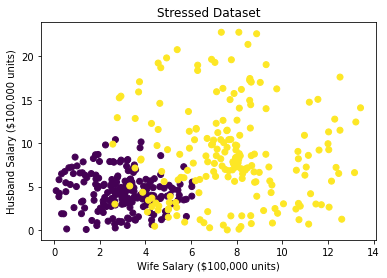

In [5]:
import matplotlib.pyplot as plt
#plot not stressed class
plt.scatter(data['X'], data['Y'],c=data['L'])
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset')

## Split Data


In [6]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(data[['X','Y']], data['L'], test_size=0.3)
#Y_training

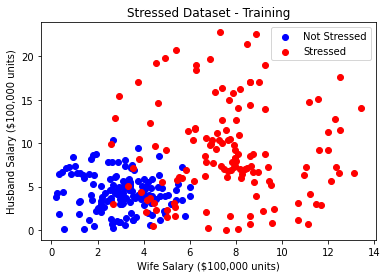

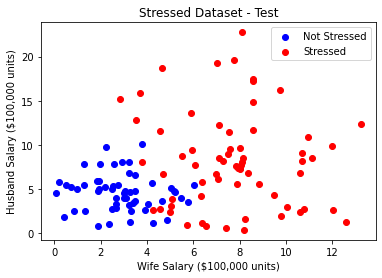

In [7]:
plt.scatter(X_training['X'][Y_training==0],X_training['Y'][Y_training==0],label='Not Stressed',color='blue')
plt.scatter(X_training['X'][Y_training==1],X_training['Y'][Y_training==1],label='Stressed',color='red')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset - Training')
plt.legend()
plt.figure()
plt.scatter(X_testing['X'][Y_testing==0],X_testing['Y'][Y_testing==0],label='Not Stressed',color='blue')
plt.scatter(X_testing['X'][Y_testing==1],X_testing['Y'][Y_testing==1],label='Stressed',color='red')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Stressed Dataset - Test')
plt.legend()

## MDC Classifier

1.   Find Class mean (For all different classes in the training Data)
2.   Classify test data based on the distance to the mean of classes



In [8]:
from sklearn.neighbors import NearestCentroid
model=NearestCentroid()
model.fit(X_training,Y_training)

NearestCentroid()

In [9]:
Y_training_predicted=model.predict(X_training)
Y_testing_predicted=model.predict(X_testing)

## K-Nearst Neighbors Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=5)
modelKNN.fit(X_training,Y_training)


KNeighborsClassifier()

In [11]:
Y_training_predicted_KNN=modelKNN.predict(X_training)
Y_testing_predicted_KNN=modelKNN.predict(X_testing)

## Visualize the decision boundary

### Check all the points in the place! (Forming decision boundary)

In [13]:
x_grid=np.arange(0,15,0.1)
y_grid=np.arange(0,25,0.1)
data_grid=[[i,j] for j in y_grid for i in x_grid]

'''
Alternatively, You can do it using numpy
xx,yy=np.meshgrid(x_grid,y_grid)
data_grid = np.array([xx, yy]).reshape(2, -1).T

'''

'\nAlternatively, You can do it using numpy\nxx,yy=np.meshgrid(x_grid,y_grid)\ndata_grid = np.array([xx, yy]).reshape(2, -1).T\n\n'

In [14]:

[[i,j] for i in range(1,3) for j in range(10,12)]

[[1, 10], [1, 11], [2, 10], [2, 11]]

In [15]:
data_grid[0:20]

[[0.0, 0.0],
 [0.1, 0.0],
 [0.2, 0.0],
 [0.30000000000000004, 0.0],
 [0.4, 0.0],
 [0.5, 0.0],
 [0.6000000000000001, 0.0],
 [0.7000000000000001, 0.0],
 [0.8, 0.0],
 [0.9, 0.0],
 [1.0, 0.0],
 [1.1, 0.0],
 [1.2000000000000002, 0.0],
 [1.3, 0.0],
 [1.4000000000000001, 0.0],
 [1.5, 0.0],
 [1.6, 0.0],
 [1.7000000000000002, 0.0],
 [1.8, 0.0],
 [1.9000000000000001, 0.0]]

In [ ]:
Predicted_MDC=model.predict(data_grid)
Predicted_KNN=modelKNN.predict(data_grid)
Predicted_MDC.shape

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but NearestCentroid was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
y_grid.shape

In [ ]:
plt.contourf(x_grid,y_grid,Predicted_MDC.reshape(y_grid.shape[0],x_grid.shape[0]))

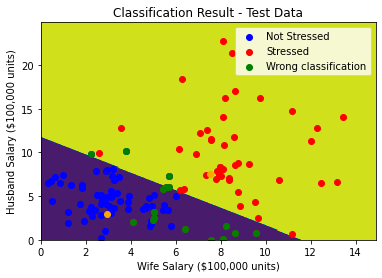

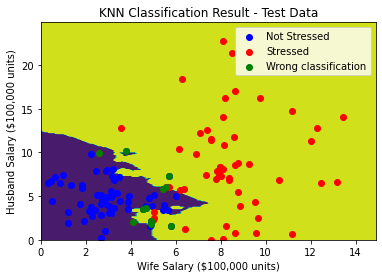

In [ ]:
plt.contourf(x_grid,y_grid,Predicted_MDC.reshape(y_grid.shape[0],x_grid.shape[0]))
plt.scatter(X_testing['X'][Y_testing==0],X_testing['Y'][Y_testing==0],label='Not Stressed',color='blue')
plt.scatter(X_testing['X'][Y_testing==1],X_testing['Y'][Y_testing==1],label='Stressed',color='red')
plt.scatter(X_testing['X'][Y_testing!=Y_testing_predicted],X_testing['Y'][Y_testing!=Y_testing_predicted],label='Wrong classification',color='green')
plt.scatter(X_training['X'][Y_training==0].mean(),X_training['X'][Y_training==0].mean(),c='orange')
plt.scatter(X_training['X'][Y_training==1].mean(),X_training['X'][Y_training==1].mean(),c='orange')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Classification Result - Test Data')
plt.legend()
plt.figure()

plt.contourf(x_grid,y_grid,Predicted_KNN.reshape(y_grid.shape[0],x_grid.shape[0]))
plt.scatter(X_testing['X'][Y_testing==0],X_testing['Y'][Y_testing==0],label='Not Stressed',color='blue')
plt.scatter(X_testing['X'][Y_testing==1],X_testing['Y'][Y_testing==1],label='Stressed',color='red')
plt.scatter(X_testing['X'][Y_testing!=Y_testing_predicted_KNN],X_testing['Y'][Y_testing!=Y_testing_predicted_KNN],label='Wrong classification',color='green')
plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('KNN Classification Result - Test Data')
plt.legend()

## Precision and Recall

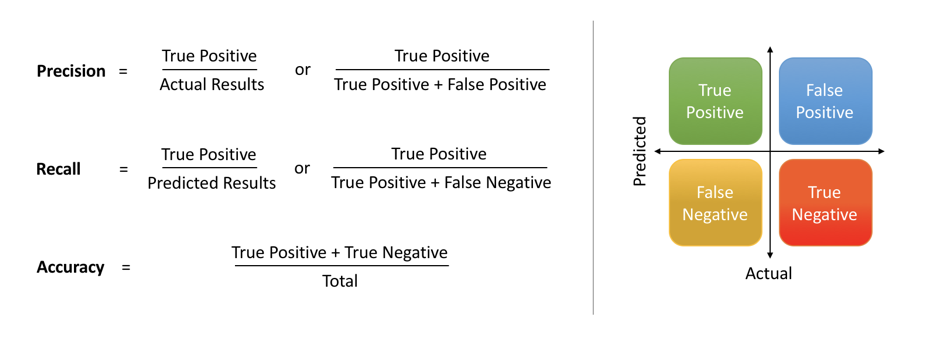

Source: https://medium.com/@shrutisaxena0617/precision-vs-recall-386cf9f89488 

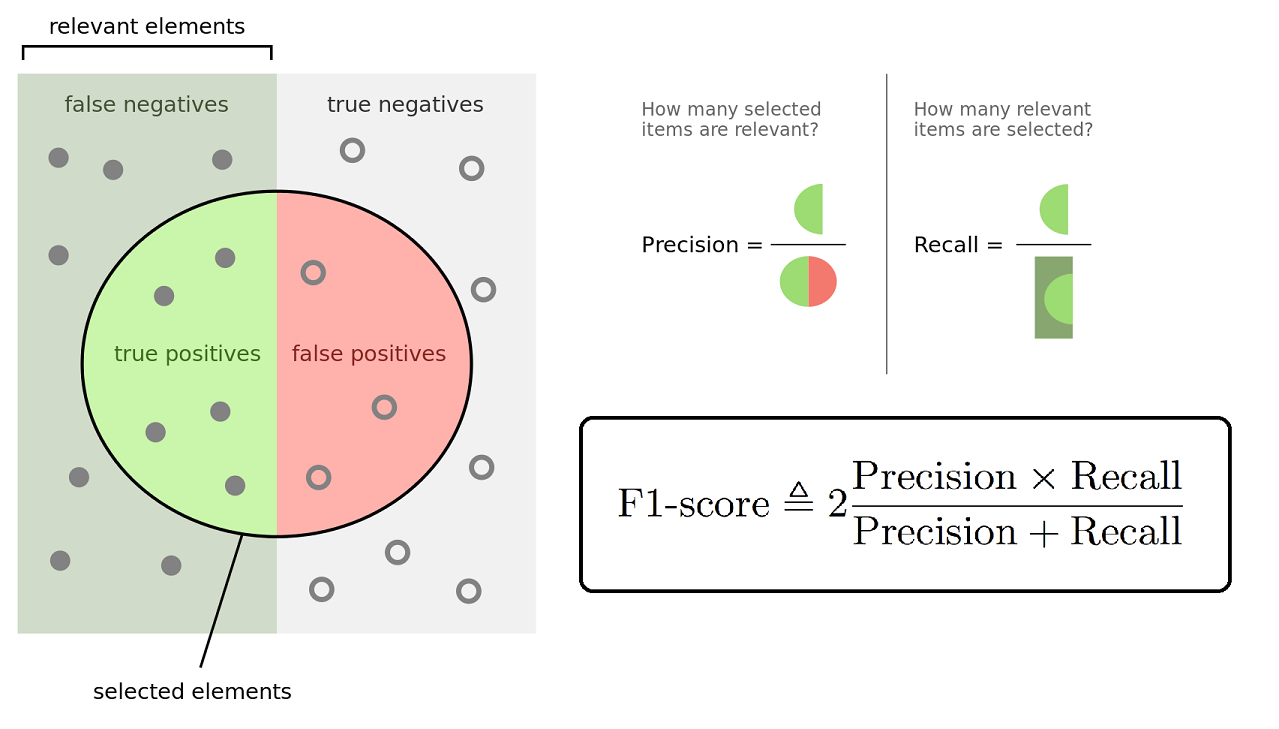

Source: https://en.wikipedia.org/wiki/Precision_and_recall

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [ ]:
confusion_matrix(Y_testing,Y_testing_predicted)

array([[59,  3],
       [13, 45]])

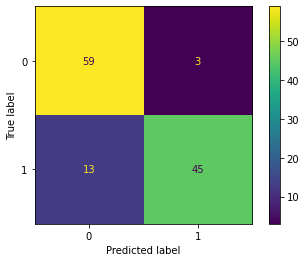

In [ ]:
plot_confusion_matrix(model,X_testing,Y_testing)

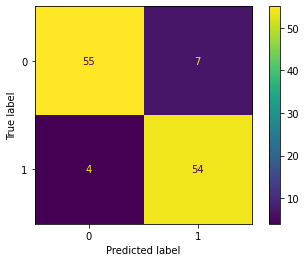

In [ ]:
plot_confusion_matrix(modelKNN,X_testing,Y_testing)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
print('MDC result:')
print(accuracy_score(Y_testing,Y_testing_predicted))
print(precision_score(Y_testing,Y_testing_predicted))
print(recall_score(Y_testing,Y_testing_predicted))

print('KNN result:')
print(accuracy_score(Y_testing,Y_testing_predicted_KNN))
print(precision_score(Y_testing,Y_testing_predicted_KNN))
print(recall_score(Y_testing,Y_testing_predicted_KNN))

MDC result:
0.8666666666666667
0.9375
0.7758620689655172
KNN result:
0.9083333333333333
0.8852459016393442
0.9310344827586207


### Visualise TP/TN/FP/FN

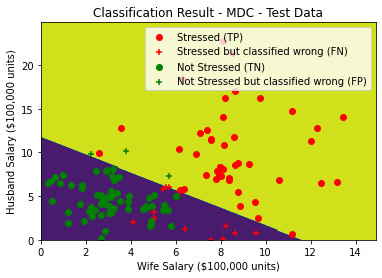

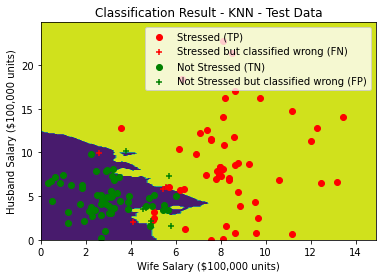

In [ ]:
plt.contourf(x_grid,y_grid,Predicted_MDC.reshape(y_grid.shape[0],x_grid.shape[0]))

#True Positive - Stressed and classified as stressed
plt.scatter(X_testing['X'][Y_testing+Y_testing_predicted==2],X_testing['Y'][Y_testing+Y_testing_predicted==2],label='Stressed (TP)',color='red')
#False Negative - Stressed and classified worng
plt.scatter(X_testing['X'][Y_testing>Y_testing_predicted],X_testing['Y'][Y_testing>Y_testing_predicted],label='Stressed but classified wrong (FN)',marker='+',color='red')

#True Negative - Not Stressed and classified as stressed
plt.scatter(X_testing['X'][Y_testing+Y_testing_predicted==0],X_testing['Y'][Y_testing+Y_testing_predicted==0],label='Not Stressed (TN)',color='green')
#False Positive - Not Stressed and classified wrong
plt.scatter(X_testing['X'][Y_testing<Y_testing_predicted],X_testing['Y'][Y_testing<Y_testing_predicted],label='Not Stressed but classified wrong (FP)',marker='+',color='green')

plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Classification Result - MDC - Test Data')
plt.legend()
plt.figure()

plt.contourf(x_grid,y_grid,Predicted_KNN.reshape(y_grid.shape[0],x_grid.shape[0]))

#True Positive - Stressed and classified as stressed
plt.scatter(X_testing['X'][Y_testing+Y_testing_predicted_KNN==2],X_testing['Y'][Y_testing+Y_testing_predicted_KNN==2],label='Stressed (TP)',color='red')
#False Negative - Stressed and classified worng
plt.scatter(X_testing['X'][Y_testing>Y_testing_predicted_KNN],X_testing['Y'][Y_testing>Y_testing_predicted_KNN],label='Stressed but classified wrong (FN)',marker='+',color='red')
#True Negative - Not Stressed and classified as stressed
plt.scatter(X_testing['X'][Y_testing+Y_testing_predicted_KNN==0],X_testing['Y'][Y_testing+Y_testing_predicted_KNN==0],label='Not Stressed (TN)',color='green')
#False Positive - Not Stressed and classified wrong
plt.scatter(X_testing['X'][Y_testing<Y_testing_predicted_KNN],X_testing['Y'][Y_testing<Y_testing_predicted_KNN],label='Not Stressed but classified wrong (FP)',marker='+',color='green')

plt.xlabel("Wife Salary ($100,000 units)")
plt.ylabel("Husband Salary ($100,000 units)")
plt.title('Classification Result - KNN - Test Data')
plt.legend()

